In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\NAVEEN REDDY\Downloads\US_Accidents_March23.csv\US_Accidents_March23.csv")

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.shape

(7728394, 46)

In [5]:
len(df.columns)

46

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
df.isna().sum().sort_values(ascending = False)[:10]

End_Lng              3402762
End_Lat              3402762
Precipitation(in)    2203586
Wind_Chill(F)        1999019
Wind_Speed(mph)       571233
Visibility(mi)        177098
Wind_Direction        175206
Humidity(%)           174144
Weather_Condition     173459
Temperature(F)        163853
dtype: int64

In [19]:
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentage[:10]

Weather_Condition    0.0113
Start_Time           0.0000
Severity             0.0000
Start_Lat            0.0000
Start_Lng            0.0000
Amenity              0.0000
Bump                 0.0000
Crossing             0.0000
Junction             0.0000
Traffic_Signal       0.0000
dtype: float64

In [20]:
missing_percentage[missing_percentage !=0]

Weather_Condition    0.0113
dtype: float64

<Axes: >

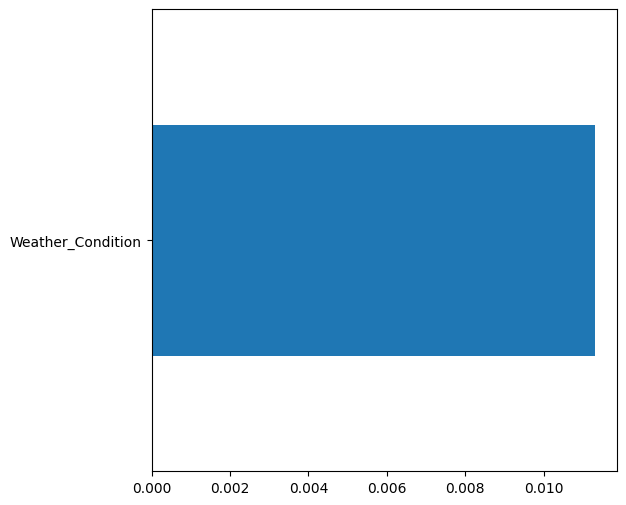

In [21]:
missing_percentage[missing_percentage !=0].plot(kind = 'barh', figsize =(6,6))

In [14]:
cities = df.City.unique()
len(cities)

13679

In [15]:
states_by_accident = df['State'].value_counts()[:10]

<Axes: xlabel='State'>

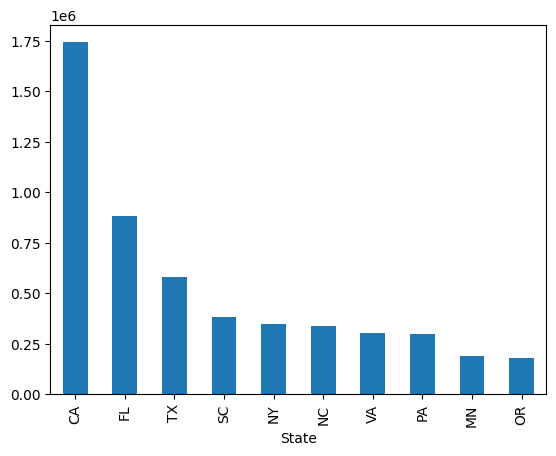

In [16]:
states_by_accident.plot(kind = 'bar')

In [17]:
df['State'].value_counts()[:5]

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
Name: count, dtype: int64

In [19]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

In [31]:
cities_by_accident[cities_by_accident == 1]

City
American Fork-Pleasant Grove    1
Waldoboro                       1
Kinsley                         1
Killona                         1
Jeanerette                      1
                               ..
Rapid River                     1
Cat Spring                      1
Glenwood City                   1
Downing                         1
Marfa                           1
Name: count, Length: 1023, dtype: int64

In [22]:
use_cols = [
    'Start_Time', 'Start_Lat', 'Start_Lng', 'Severity',
    'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Junction',
    'Traffic_Signal'
]
df = pd.read_csv(r"C:\Users\NAVEEN REDDY\Downloads\US_Accidents_March23.csv\US_Accidents_March23.csv", usecols=use_cols, 
                 nrows=40000, parse_dates=['Start_Time'])

In [23]:
df.dropna(subset=['Start_Time', 'Start_Lat', 'Start_Lng'], inplace=True)

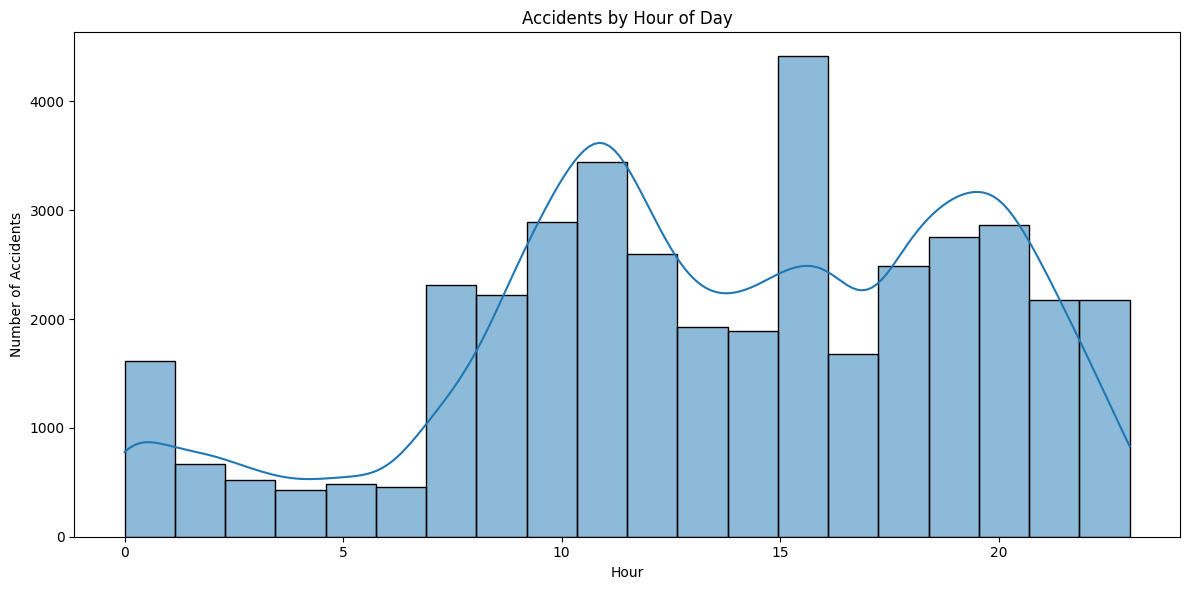

In [25]:
df['Hour'] = df['Start_Time'].dt.hour
plt.figure(figsize=(12,6))
sns.histplot(df['Hour'], bins=20, kde=True)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

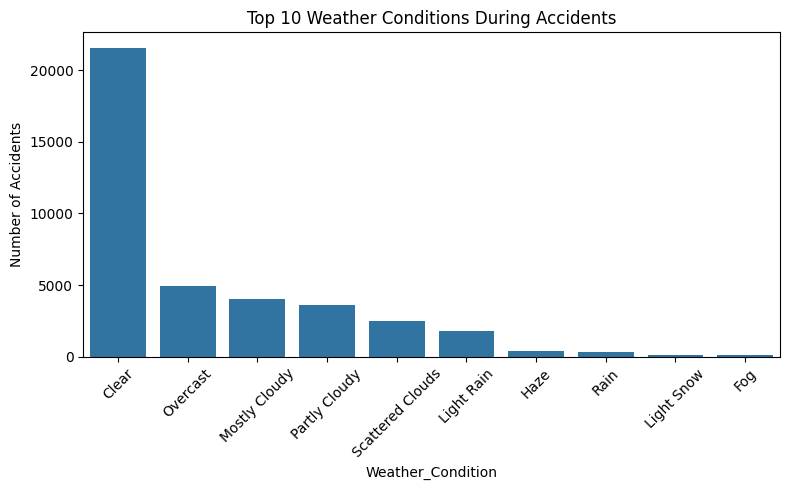

In [14]:
plt.figure(figsize=(8,5))
top_weather = df['Weather_Condition'].value_counts().nlargest(10)
sns.barplot(x=top_weather.index, y=top_weather.values)
plt.title('Top 10 Weather Conditions During Accidents')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
road_features = ['Amenity', 'Bump', 'Crossing', 'Junction', 'Traffic_Signal']
road_data = df[road_features].sum().sort_values(ascending=False)

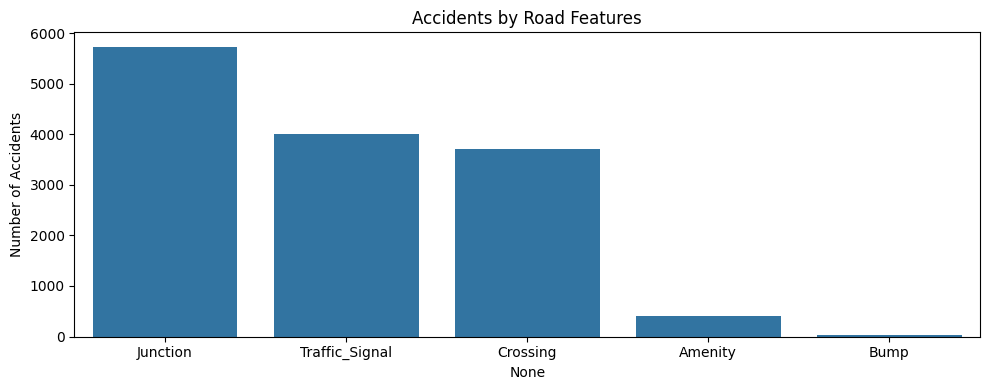

In [13]:
plt.figure(figsize=(10,4))
sns.barplot(x=road_data.index, y=road_data.values)
plt.title('Accidents by Road Features')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()